Chamfer Distance tensor([0.0180])


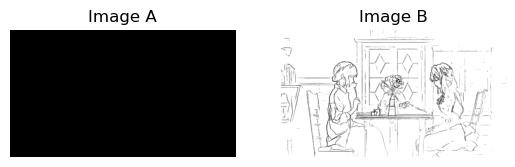

In [17]:
'''
Returns the Chamfer Distance between two images
'''

from _eval.chamfer_dist import batch_chamfer_distance
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt


path_a = 'mini_datasets/cd_visualizer/violet2.png'
path_b = 'mini_datasets/cd_visualizer/violet3.png'


# Read batch of images as torch tensors
# img_a = torch.tensor(np.array(Image.open(path_a)), dtype=torch.float32).squeeze() / 255.0
img_b = torch.tensor(np.array(Image.open(path_b)), dtype=torch.float32).squeeze() / 255.0
# create blank image: image with white pixels only (value of 1) with the same shape of image b
img_a = torch.ones_like(img_b)- 1.0

# Unsqueeze to add batch dimension if there aren't any (batch_chamfer_distance() expects a batch of images)
if len(img_a.shape) < 3:
    img_a = img_a.unsqueeze(0)
    img_b = img_b.unsqueeze(0)


# Calculate Chamfer Distance
chamfer_distance = batch_chamfer_distance(img_a, img_b)
print('Chamfer Distance', chamfer_distance)


# Visualize the images
plt.figure()
plt.subplot(1, 2, 1)  # arguments are nrows, ncols, index
plt.imshow(img_a.squeeze(0), cmap='gray', vmin=0, vmax=1)
plt.title("Image A")
plt.grid(False)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_b.squeeze(0), cmap='gray', vmin=0, vmax=1)
plt.title("Image B")
plt.grid(False)
plt.axis('off')

plt.show()